In [157]:
import numpy as np
from matplotlib import pyplot as plt


data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)


def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/dim)*s
    
    return w

def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        
        if check_True(pattern):
            print ("It took:",count,"nr of iterations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
  
        elif np.array_equal(pattern,previousPattern):
            print("Local minimum found in iteration:",count)
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
            
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern):
    solved = False
    for i in range(patterns.shape[0]):
        if np.array_equal(patterns[i],predicted_pattern):
            #print("True! It matched pattern nr:",i)
            solved = True
    return solved

def flip(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    #plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    #plt.show()
    
    return flipped

## Investigate Capacity
Here we want to investigate how many pictures the network is able to store

In [244]:
patterns = data[:9,:]
correctList = []

In [245]:
w = new_init_weights(patterns)

***With 1 nr of patterns in w-matrix***
1 of patterns remained stable

***With 2 nr of patterns in w-matrix***
2 of patterns remained stable

***With 3 nr of patterns in w-matrix***
3 of patterns remained stable

***With 4 nr of patterns in w-matrix***
none remained stable

***With 5 nr of patterns in w-matrix***
none remained stable

***With 6 nr of patterns in w-matrix***
none remained stable

***With 7 nr of patterns in w-matrix***
none remained stable

***With 8 nr of patterns in w-matrix***
none remained stable

***With 9 nr of patterns in w-matrix***
none remained stable



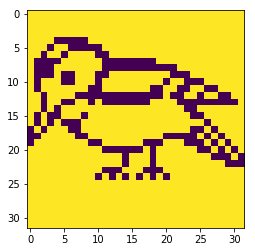

In [246]:
plt.imshow(patterns[5].reshape(32,32),interpolation="nearest")
plt.show()

### Now the same thing with some random patterns

In [250]:
random_patterns = []
nrOfVectors=150
for i in range(nrOfVectors):
    random_patterns.append(genRandVector(1024))
random_patterns = np.array(random_patterns)

correctList = [] #Global variable

In [251]:
w_rand = new_init_weights(random_patterns)

***With 1 nr of patterns in w-matrix***
1 of patterns remained stable

***With 2 nr of patterns in w-matrix***
2 of patterns remained stable

***With 3 nr of patterns in w-matrix***
3 of patterns remained stable

***With 4 nr of patterns in w-matrix***
4 of patterns remained stable

***With 5 nr of patterns in w-matrix***
5 of patterns remained stable

***With 6 nr of patterns in w-matrix***
6 of patterns remained stable

***With 7 nr of patterns in w-matrix***
7 of patterns remained stable

***With 8 nr of patterns in w-matrix***
8 of patterns remained stable

***With 9 nr of patterns in w-matrix***
9 of patterns remained stable

***With 10 nr of patterns in w-matrix***
10 of patterns remained stable

***With 11 nr of patterns in w-matrix***
11 of patterns remained stable

***With 12 nr of patterns in w-matrix***
12 of patterns remained stable

***With 13 nr of patterns in w-matrix***
13 of patterns remained stable

***With 14 nr of patterns in w-matrix***
14 of patterns remained stab

# 300 random patterns in a 100-unit network

In the section we're exploring how the stableness of stored patterns changes as the nr of patterns in the weight-matrix increases

In [ ]:
def new_init_weights(patterns,zeroDiag=False):
    dim = patterns.shape[1]
    n = patterns.shape[0]
    w=np.zeros((dim,dim))
    
    for i in range(n): 
        w+=1/dim*np.multiply.outer(patterns[i],patterns[i])
        if(zeroDiag):
            np.fill_diagonal(w,0)
        experiment(w,i,patterns)   
    return w

def experiment(w,iterations,patterns,plsReturn=False):
    N = patterns.shape[0] #Nr of patterns 
    outcomeList = []
    
    #Iterate over the amount of patterns that have been inserted to w
    for i in range(iterations+1):
        outcome = checkStable(patterns[i],w)
        outcomeList.append(outcome)

    unique,counts=np.unique(np.array(outcomeList),return_counts=True)
    a = dict(zip(unique, counts))
    print("***With",iterations+1,"nr of patterns in w-matrix***")
    if True in a:
        print(a[True],"of patterns remained stable\n")
        correctList.append(a[True])
    else:
        print("none remained stable\n")
        correctList.append(0)
    if(plsReturn):
        return correctList
        
#Checks if pattern changes during one iteration, if not it's stable
def checkStable(pattern,w): 
    s = np.dot(w,pattern)
    s[s >= 0] = 1
    s[s < 0] = -1

    if(np.array_equal(pattern,s)):
        return True
    else:
        return False
        
def genRandVector(dim):
    dim = int(dim/2)
    randVector = np.concatenate([np.ones(dim),-1*np.ones(dim)])
    np.random.shuffle(randVector)
    #print(randVector)
    return randVector

In [ ]:
patterns = []
nrOfVectors=300
for i in range(nrOfVectors):
    patterns.append(genRandVector(144)) #Gets a 100 unit vector
patterns = np.array(patterns)

In [ ]:
correctList = []
w_1 = new_init_weights(patterns)

In [ ]:
plt.plot(range(len(correctList)),correctList)
plt.title("Amount of stable patterns per pattern in w")
plt.show()

In [ ]:
flipped_patterns = []
for pat in patterns:
    flipped_patterns.append(flip(pat,0.05))
flipped_patterns = np.array(flipped_patterns)

correctList = []
w_2 = new_init_weights(flipped_patterns)

In [ ]:
plt.plot(range(len(correctList)),correctList)
plt.title("Amount of stable patterns per pattern in w when patterns are distorted")
plt.show()

In [ ]:
##Adding a 0-diagonal t
correctList = []
w_3 = new_init_weights(patterns,zeroDiag=True)

In [ ]:
plt.plot(range(len(correctList)),correctList)
plt.title("Amount of stable patterns per pattern in w with diagonalized w")
plt.show()

In [ ]:
##...And now also with distortion
correctList = []
w_4 = new_init_weights(flipped_patterns,zeroDiag=True)

In [ ]:
plt.plot(range(len(correctList)),correctList)
plt.title("Amount of stable patterns per pattern in w\n with diagonalized w and distorted patterns")
plt.show()

## Now we add bias to the equation...

In [ ]:
biased_patterns = np.sign(0.5+np.random.randn(300,144))
correctList = []
w_5 = new_init_weights(biased_patterns)

In [ ]:
plt.plot(range(len(correctList)),correctList)
plt.title("Amount of stable patterns per pattern in w\n with biased patterns")
plt.show()